# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/jiaopingwang/Data_Scicence/LHL_DS_Learning/w7/day_4_w7/mini-project-4/data/data.csv", ) 
df.shape

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(614, 13)

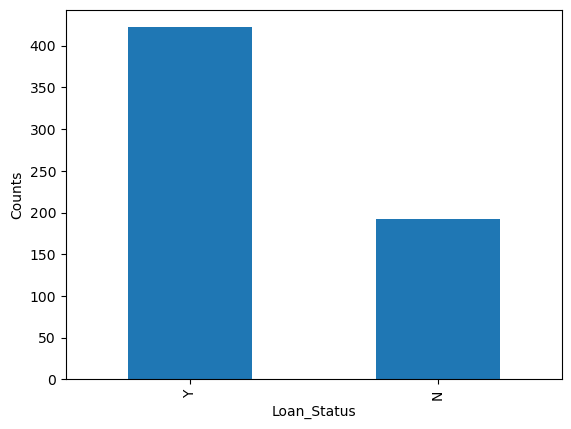

Y    422
N    192
Name: Loan_Status, dtype: int64

In [2]:
fig, ax = plt.subplots()
#c = ['blue', 'orange']
df['Loan_Status'].value_counts().plot(ax=ax, kind='bar', xlabel='Loan_Status', ylabel='Counts')
plt.show()
df['Loan_Status'].value_counts()

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Dependents'] = df.Dependents.replace({'3+': 3})
# merge_df_f1['carrier'] = merge_df_f1.carrier.replace({'American Airlines':1, 
#                                           'Delta Airlines':2,
#                                           'United Airlines':3,
#                                           'Southwest Airlines':4,
#                                           'Alaska Airlines':5,
#                                           'JetBlue Airways':6,
#                                           'SkyWest Airlines':7,
#                                           'Republic Airways':8,
#                                           'Spirit Airlines':9,
#                                           'Frontier Airlines':10,
#                                           'ExpressJet':11,
#                                           'ZW':12,
#                                           'Allegiant Air':13
#                                           })
#df1 = df.dropna()

In [6]:
#df1.shape
#df1.dtypes
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Look at some basic statistics for numerical variables.

In [7]:
nudf = df.select_dtypes(include=np.number)

In [8]:
nudf.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
5,5417,4196.0,267.0,360.0,1.0
6,2333,1516.0,95.0,360.0,1.0
7,3036,2504.0,158.0,360.0,0.0
8,4006,1526.0,168.0,360.0,1.0
9,12841,10968.0,349.0,360.0,1.0


In [9]:
nudf.isnull().sum(axis = 0)

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



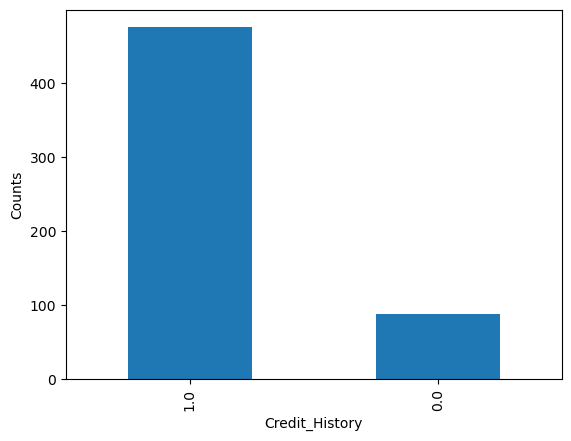

In [10]:
#How many applicants have a Credit_History? 
fig, ax = plt.subplots()

nudf['Credit_History'].value_counts().plot(ax=ax, kind='bar', xlabel='Credit_History', ylabel='Counts')

plt.show()

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>]], dtype=object)

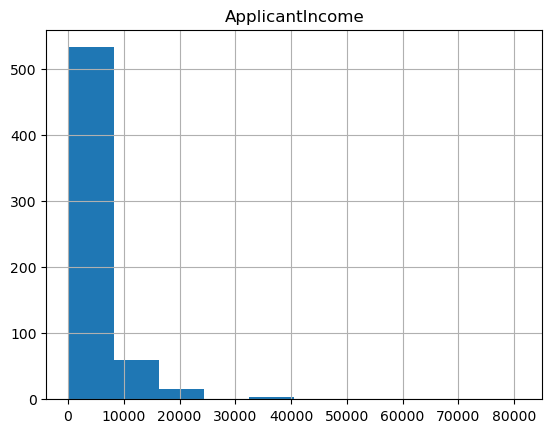

In [11]:
#Is the ApplicantIncome distribution in line with your expectation? Similarly, what about CoapplicantIncome?

nudf.hist(column='ApplicantIncome')

array([[<AxesSubplot:title={'center':'CoapplicantIncome'}>]], dtype=object)

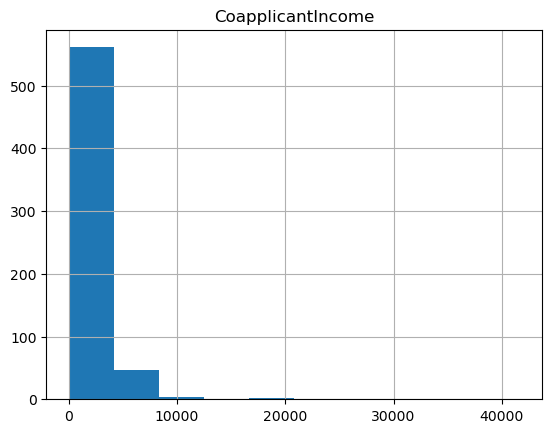

In [12]:
nudf.hist(column='CoapplicantIncome')

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [13]:
cadf = df.select_dtypes(include='object')
cadf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [28]:
cadf.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [14]:
print(cadf['Gender'].unique())
print(cadf['Married'].unique())
print(cadf['Dependents'].unique())
print(cadf['Self_Employed'].unique())
print(cadf['Property_Area'].unique())
print(cadf['Loan_Status'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' 3 nan]
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [15]:
cadf1 = df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area', 'Education']]

In [16]:
cadf2 = df[['Education', 'Credit_History', 'Dependents', 'Gender']]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

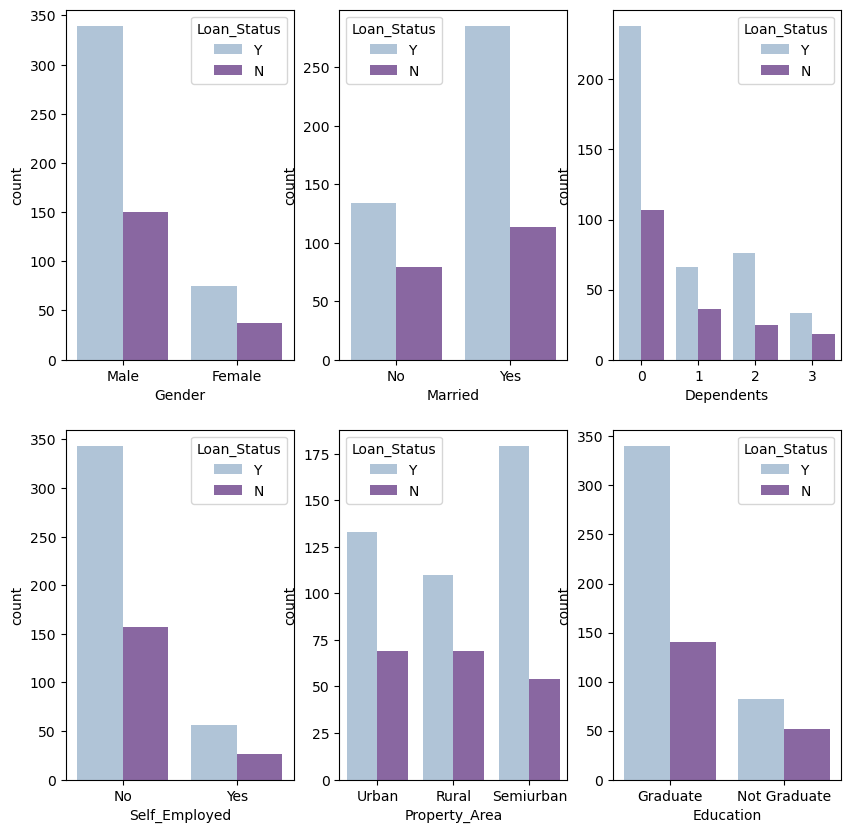

In [22]:
fig, ax = plt.subplots(2, 3, figsize = (10, 10))
for i, subplots in zip(cadf1, ax.flatten()):
    sns.countplot(cadf1[i], hue = df['Loan_Status'], ax = subplots, palette = 'BuPu')
plt.show()

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

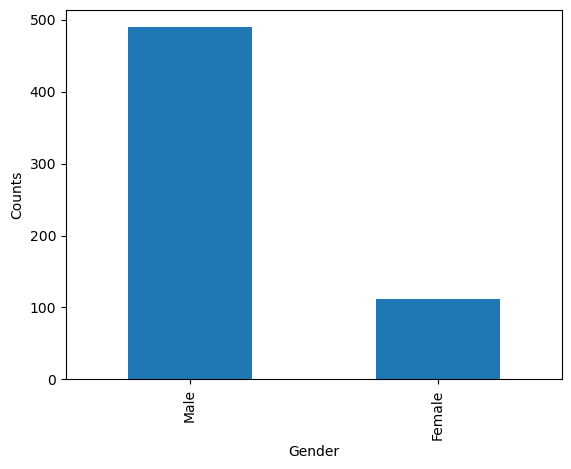

In [23]:
#gender

fig, ax = plt.subplots()

cadf['Gender'].value_counts().plot(ax=ax, kind='bar', xlabel='Gender', ylabel='Counts')

plt.show()

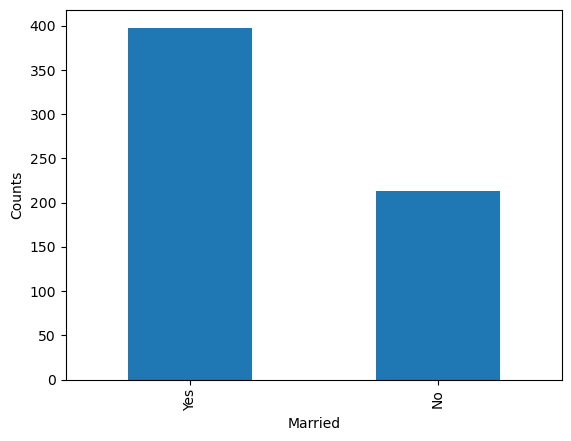

In [24]:
#Married 
fig, ax = plt.subplots()

cadf['Married'].value_counts().plot(ax=ax, kind='bar', xlabel='Married', ylabel='Counts')

plt.show()

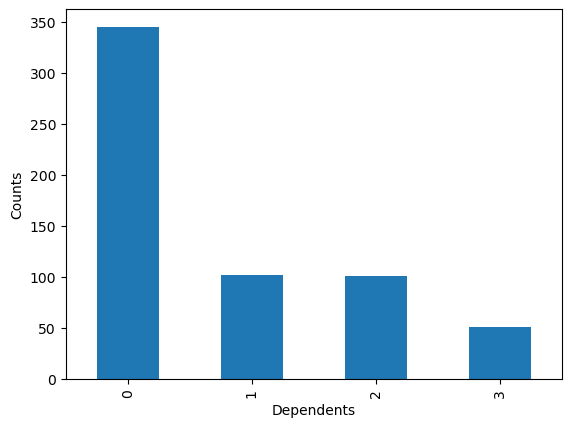

In [25]:
#Dependents
fig, ax = plt.subplots()

cadf['Dependents'].value_counts().plot(ax=ax, kind='bar', xlabel='Dependents', ylabel='Counts')

plt.show()

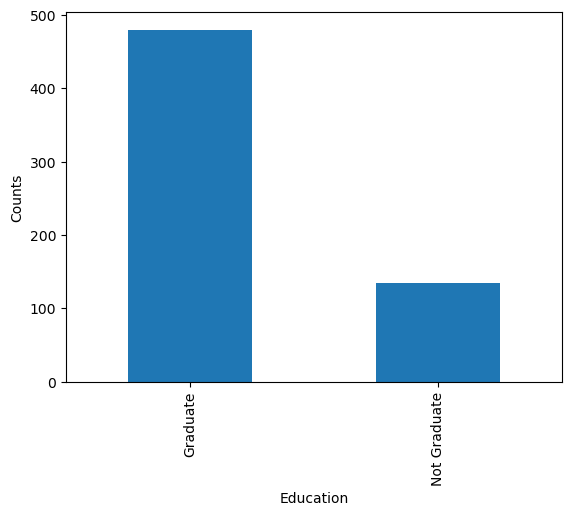

In [26]:
#Education 
fig, ax = plt.subplots()

cadf['Education'].value_counts().plot(ax=ax, kind='bar', xlabel='Education', ylabel='Counts')

plt.show()

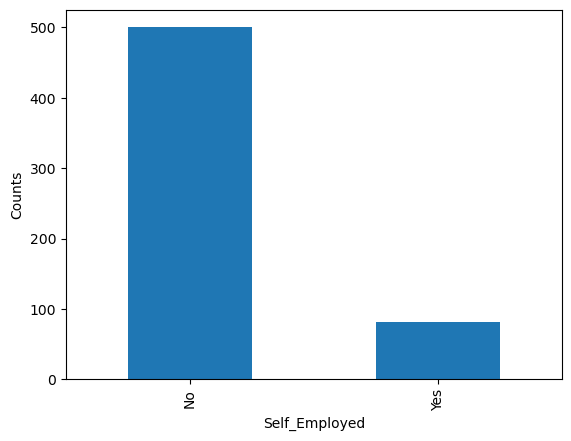

In [27]:
#Self_Employed
fig, ax = plt.subplots()

cadf['Self_Employed'].value_counts().plot(ax=ax, kind='bar', xlabel='Self_Employed', ylabel='Counts')

plt.show()

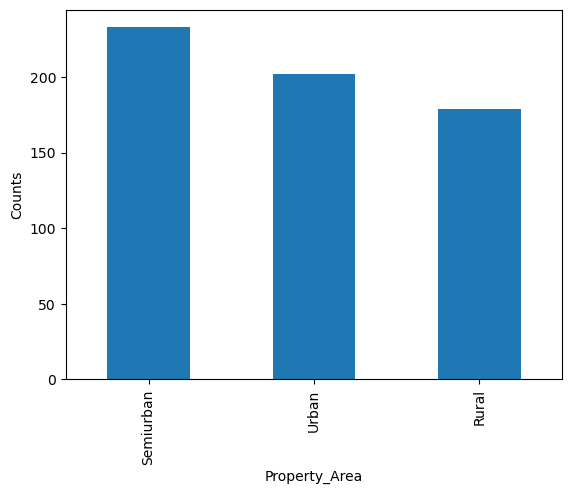

In [28]:
#Property_Area
fig, ax = plt.subplots()

cadf['Property_Area'].value_counts().plot(ax=ax, kind='bar', xlabel='Property_Area', ylabel='Counts')

plt.show()

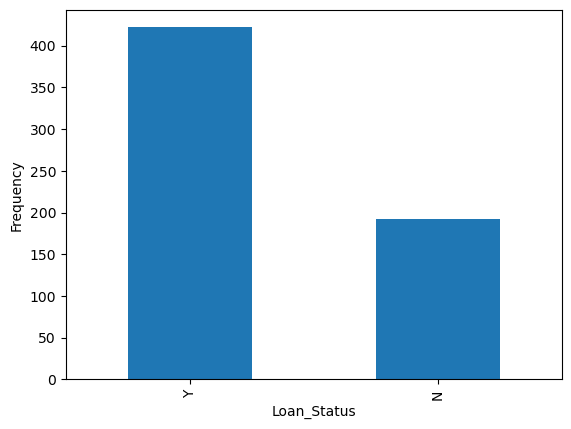

In [29]:
#Loan_Status
fig, ax = plt.subplots()

cadf['Loan_Status'].value_counts().plot(ax=ax, kind='bar', xlabel='Loan_Status', ylabel='Frequency')

plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



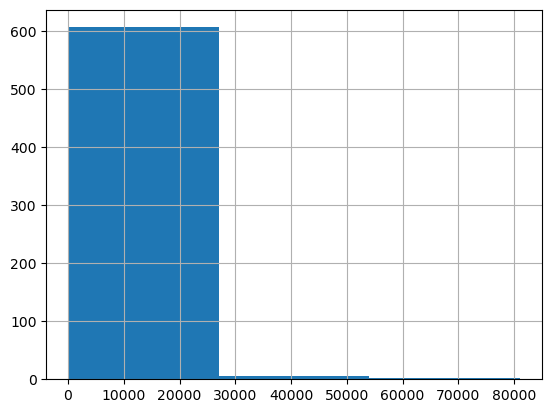

In [30]:
#ApplicantIncome,
hist_app = nudf['ApplicantIncome'].hist(bins=3)

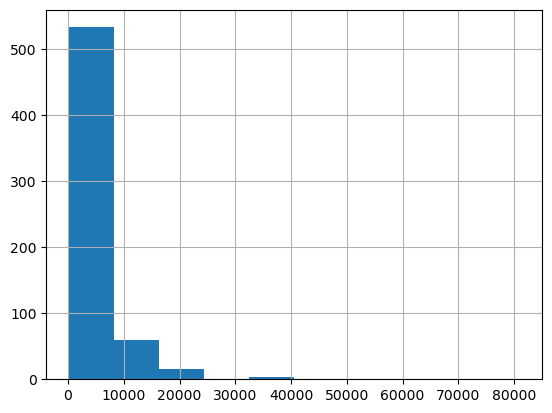

In [31]:
hist_app = nudf['ApplicantIncome'].hist(bins=10)

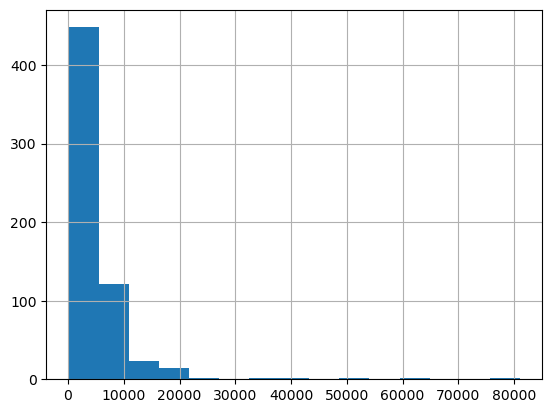

In [32]:
hist_app = nudf['ApplicantIncome'].hist(bins=15)

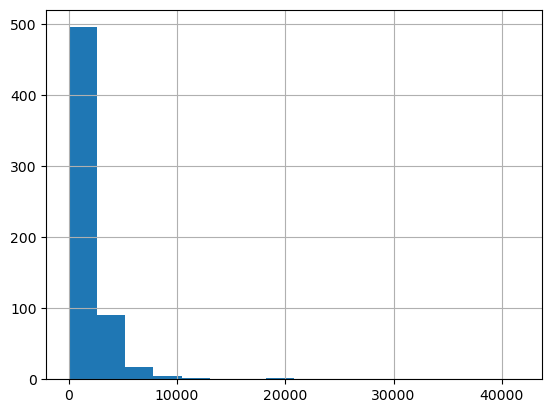

In [33]:
# CoapplicantIncome
hist_coa = nudf['CoapplicantIncome'].hist(bins=16)


Look at box plots to understand the distributions. 

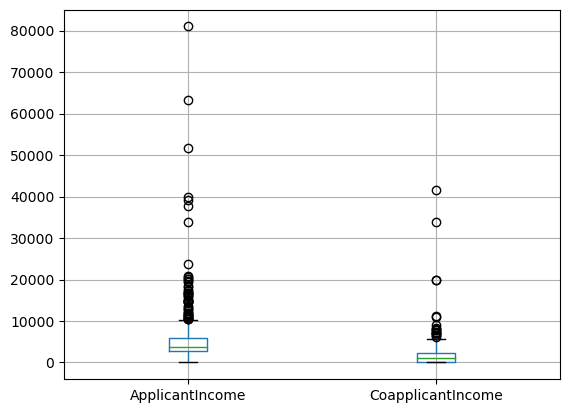

In [34]:
# boxplot
boxplot = nudf.boxplot(column=['ApplicantIncome', 'CoapplicantIncome'])

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

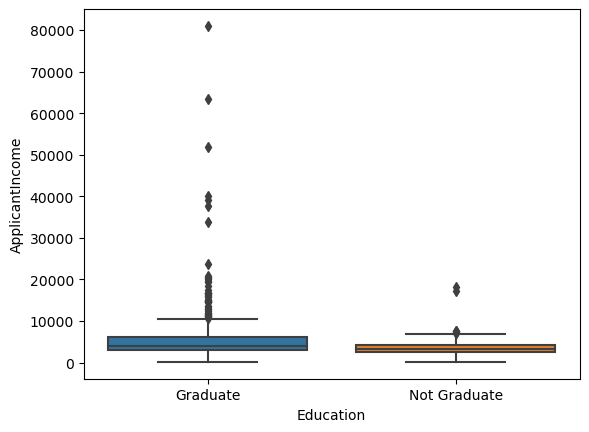

In [36]:
sns.boxplot(x ='Education',  y = 'ApplicantIncome', data = df)

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

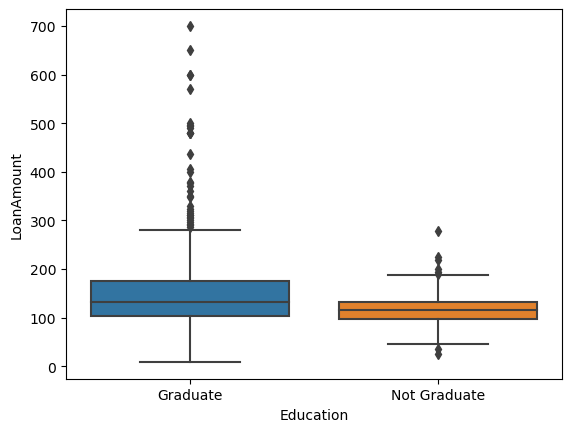

In [37]:
sns.boxplot(x ='Education',  y = 'LoanAmount', data = df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

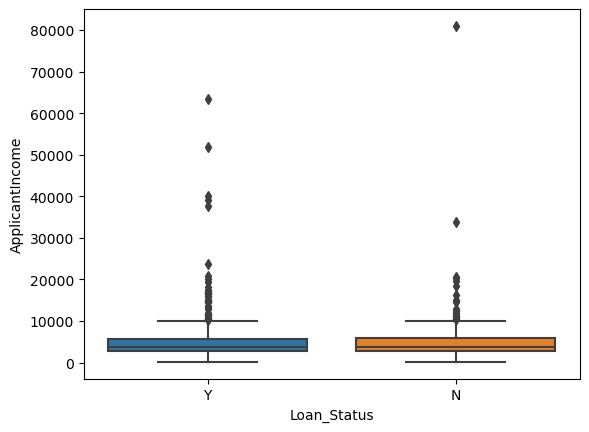

In [43]:
import seaborn as sns
sns.boxplot(x ='Loan_Status',  y = 'ApplicantIncome', data = df)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

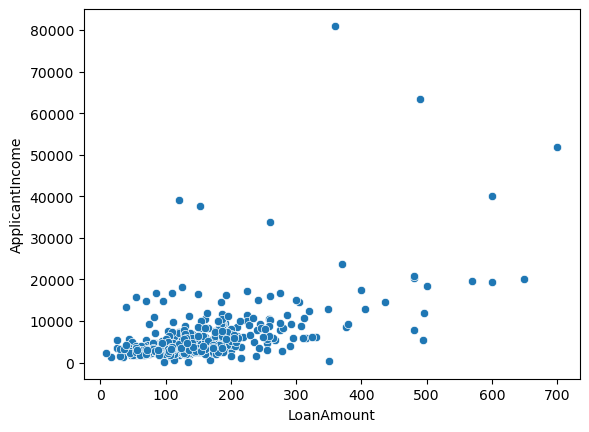

In [39]:
import seaborn as sns
sns.scatterplot(x ='LoanAmount',  y = 'ApplicantIncome', data = df)

In [40]:
nudf.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0


Look at the histogram and boxplot of LoanAmount

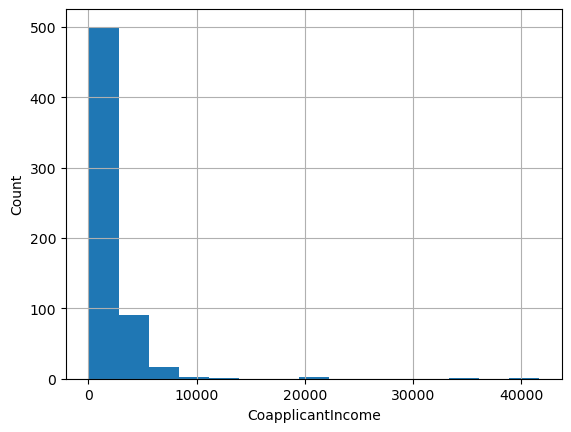

In [41]:
hist_loan = nudf['CoapplicantIncome'].hist(bins=15)
plt.ylabel('Count')
plt.xlabel('CoapplicantIncome');

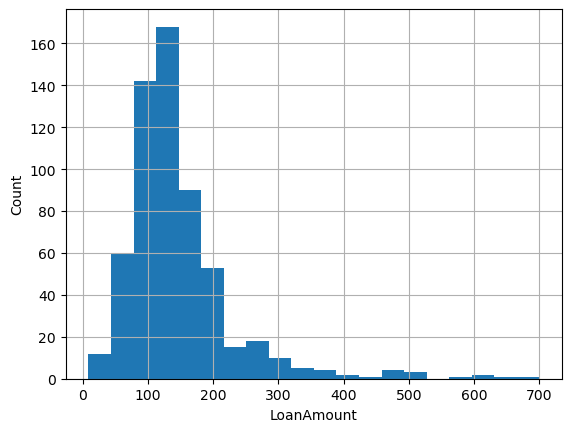

In [42]:
hist_loan = nudf['LoanAmount'].hist(bins=20)
plt.ylabel('Count')
plt.xlabel('LoanAmount');

<AxesSubplot:>

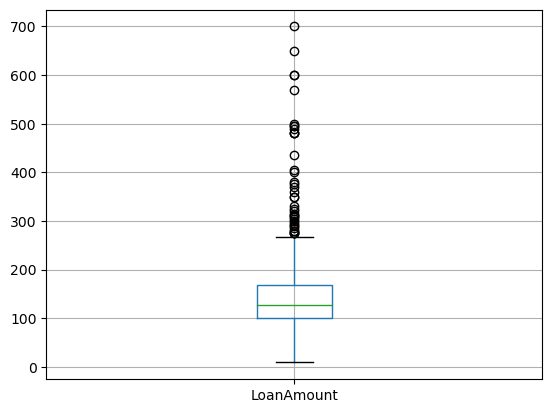

In [43]:
nudf.boxplot(column=['LoanAmount'])

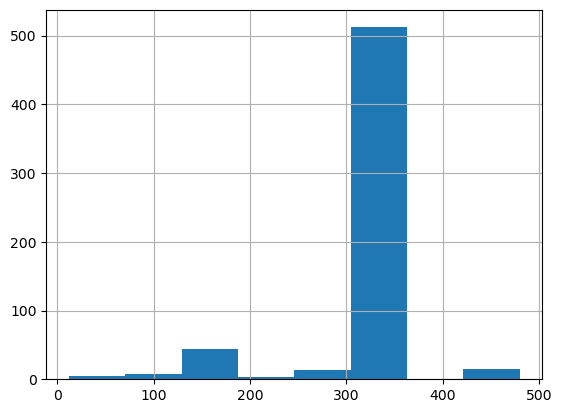

In [44]:
hist_loan = nudf['Loan_Amount_Term'].hist(bins=8)

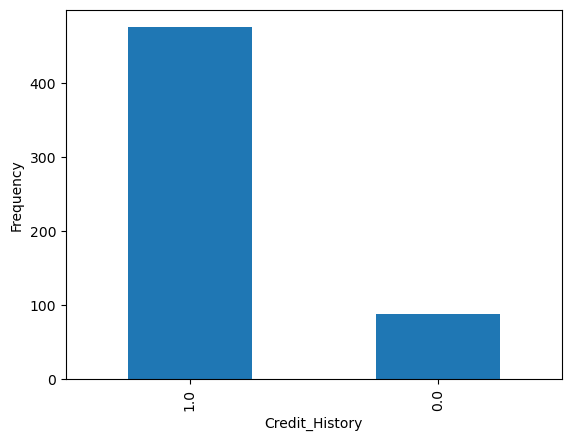

In [45]:
#Loan_Status
fig, ax = plt.subplots()

nudf['Credit_History'].value_counts().plot(ax=ax, kind='bar', xlabel='Credit_History', ylabel='Frequency')

plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [46]:
cadf1 = cadf[['Loan_Status','Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']]

In [47]:
table = pd.pivot_table(cadf1, index=['Loan_Status', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'],
                    columns=['Dependents'], aggfunc=np.sum)
table

Empty DataFrame
Columns: []
Index: [(N, Female, No, Graduate, No, Rural), (N, Female, No, Graduate, No, Semiurban), (N, Female, No, Graduate, No, Urban), (N, Female, No, Graduate, Yes, Rural), (N, Female, No, Graduate, Yes, Semiurban), (N, Female, No, Not Graduate, No, Rural), (N, Female, No, Not Graduate, No, Urban), (N, Female, No, Not Graduate, Yes, Semiurban), (N, Female, Yes, Graduate, No, Rural), (N, Female, Yes, Graduate, No, Urban), (N, Female, Yes, Graduate, Yes, Rural), (N, Female, Yes, Graduate, Yes, Urban), (N, Female, Yes, Not Graduate, No, Semiurban), (N, Male, No, Graduate, No, Rural), (N, Male, No, Graduate, No, Semiurban), (N, Male, No, Graduate, No, Urban), (N, Male, No, Graduate, Yes, Rural), (N, Male, No, Graduate, Yes, Urban), (N, Male, No, Not Graduate, No, Rural), (N, Male, No, Not Graduate, No, Semiurban), (N, Male, No, Not Graduate, No, Urban), (N, Male, No, Not Graduate, Yes, Semiurban), (N, Male, No, Not Graduate, Yes, Urban), (N, Male, Yes, Graduate, No, Rural), (N, Male, Yes, Graduate, No, Semiurban), (N, Male, Yes, Graduate, No, Urban), (N, Male, Yes, Graduate, Yes, Rural), (N, Male, Yes, Graduate, Yes, Semiurban), (N, Male, Yes, Graduate, Yes, Urban), (N, Male, Yes, Not Graduate, No, Rural), (N, Male, Yes, Not Graduate, No, Semiurban), (N, Male, Yes, Not Graduate, No, Urban), (N, Male, Yes, Not Graduate, Yes, Rural), (N, Male, Yes, Not Graduate, Yes, Semiurban), (Y, Female, No, Graduate, No, Rural), (Y, Female, No, Graduate, No, Semiurban), (Y, Female, No, Graduate, No, Urban), (Y, Female, No, Graduate, Yes, Semiurban), (Y, Female, No, Graduate, Yes, Urban), (Y, Female, No, Not Graduate, No, Rural), (Y, Female, No, Not Graduate, No, Semiurban), (Y, Female, No, Not Graduate, No, Urban), (Y, Female, No, Not Graduate, Yes, Semiurban), (Y, Female, No, Not Graduate, Yes, Urban), (Y, Female, Yes, Graduate, No, Semiurban), (Y, Female, Yes, Graduate, No, Urban), (Y, Female, Yes, Graduate, Yes, Semiurban), (Y, Female, Yes, Not Graduate, No, Rural), (Y, Female, Yes, Not Graduate, No, Semiurban), (Y, Female, Yes, Not Graduate, Yes, Rural), (Y, Male, No, Graduate, No, Rural), (Y, Male, No, Graduate, No, Semiurban), (Y, Male, No, Graduate, No, Urban), (Y, Male, No, Graduate, Yes, Rural), (Y, Male, No, Graduate, Yes, Semiurban), (Y, Male, No, Graduate, Yes, Urban), (Y, Male, No, Not Graduate, No, Rural), (Y, Male, No, Not Graduate, No, Semiurban), (Y, Male, No, Not Graduate, No, Urban), (Y, Male, No, Not Graduate, Yes, Rural), (Y, Male, No, Not Graduate, Yes, Semiurban), (Y, Male, Yes, Graduate, No, Rural), (Y, Male, Yes, Graduate, No, Semiurban), (Y, Male, Yes, Graduate, No, Urban), (Y, Male, Yes, Graduate, Yes, Rural), (Y, Male, Yes, Graduate, Yes, Semiurban), (Y, Male, Yes, Graduate, Yes, Urban), (Y, Male, Yes, Not Graduate, No, Rural), (Y, Male, Yes, Not Graduate, No, Semiurban), (Y, Male, Yes, Not Graduate, No, Urban), (Y, Male, Yes, Not Graduate, Yes, Rural), (Y, Male, Yes, Not Graduate, Yes, Semiurban), (Y, Male, Yes, Not Graduate, Yes, Urban)]

[73 rows x 0 columns]

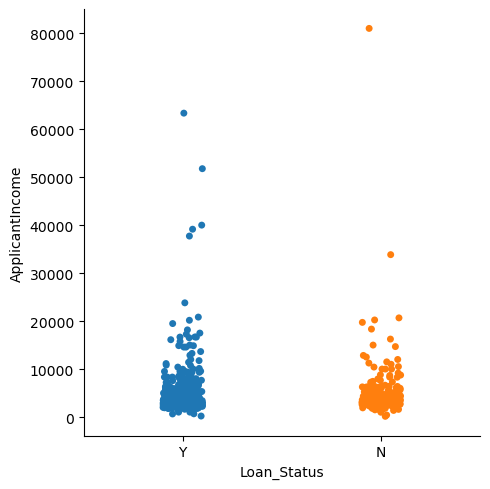

In [48]:
sns.catplot(data=df, x="Loan_Status", y="ApplicantIncome")

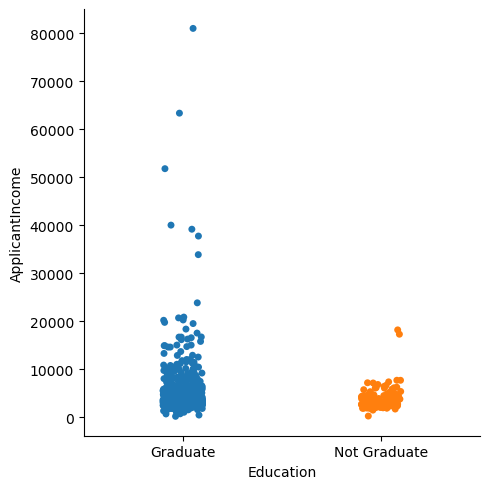

In [49]:
sns.catplot(data=df, x="Education", y="ApplicantIncome")

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [50]:
# Numerical 
nudf.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [51]:
nudf.head(100)
#nudf['LoanAmount'].value_counts()
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [52]:
df['Loan_Status'] = df.Loan_Status.replace({'Y': 1, 'N': 0})

In [53]:
def is_missing(Cat1,Cat2):    
    if np.isnan(Cat1):        
        return Cat2
    else:
        return Cat1

df['LoanAmount'] = df.apply(lambda x: is_missing(x['LoanAmount'],x['Loan_Status']),axis=1)

In [54]:
df['LoanAmount'].median()

125.0

In [55]:
df['LoanAmount']  = df.LoanAmount.replace({1.0: 125.0})

In [56]:
df['LoanAmount'].value_counts()

120.0    20
125.0    18
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 204, dtype: int64

In [57]:
def is_missing(Cat1,Cat2):    
    if np.isnan(Cat1):        
        return Cat2
    else:
        return Cat1

df['Loan_Amount_Term'] = df.apply(lambda x: is_missing(x['Loan_Amount_Term'],x['Loan_Status']),axis=1)

In [58]:
df['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [59]:
df['Loan_Amount_Term']  = df.Loan_Amount_Term.replace({1.0: 360.0})

In [60]:
df['Loan_Amount_Term'].value_counts()

360.0    520
180.0     44
480.0     15
300.0     13
0.0        6
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [61]:
#df['LoanAmount'].value_counts()
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,125.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [62]:
#len(df[df.LoanAmount == 'Y'])

In [63]:
#mode
cadf['Gender'].fillna(cadf['Gender'].mode()[0], inplace=True)
cadf['Married'].fillna(cadf['Married'].mode()[0], inplace=True)
cadf['Dependents'].fillna(cadf['Dependents'].mode()[0], inplace=True)
cadf['Self_Employed'].fillna(cadf['Self_Employed'].mode()[0], inplace=True)

In [64]:
nudf['Credit_History'].fillna(nudf['Credit_History'].mode()[0], inplace=True)

In [65]:
nudf['LoanAmount']=df['LoanAmount']

In [66]:
nudf['LoanAmount'].value_counts()

120.0    20
125.0    18
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 204, dtype: int64

In [67]:
nudf['Loan_Amount_Term'] = df['Loan_Amount_Term']

In [68]:
nudf['Loan_Amount_Term'].value_counts()

360.0    520
180.0     44
480.0     15
300.0     13
0.0        6
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [69]:
nudf.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [70]:
cadf.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [71]:
# Categorical 

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [72]:
df['log_LoanAmount'] = np.log2(df['LoanAmount'])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
df['log_ApplicantIncome'] = np.log2(df['ApplicantIncome'])

<AxesSubplot:>

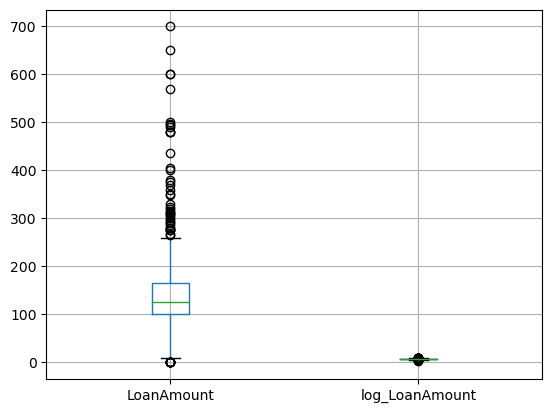

In [74]:
df.boxplot(column=['LoanAmount', 'log_LoanAmount'])

In [75]:
df['log_CoapplicantIncome'] = np.log2(df['CoapplicantIncome'])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


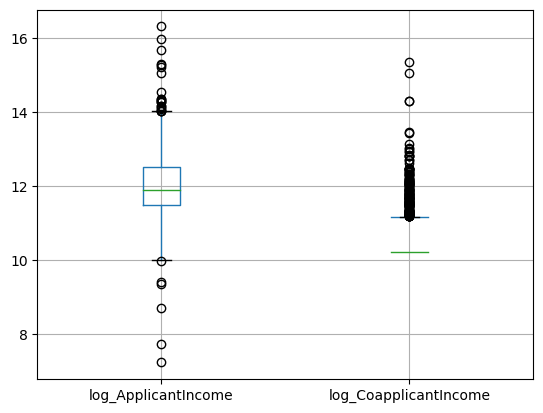

In [76]:
boxplot = df.boxplot(column=['log_ApplicantIncome', 'log_CoapplicantIncome'])

Combine both incomes as total income and take a log transformation of the same.

In [77]:
df['total_income'] = df['CoapplicantIncome']+nudf['ApplicantIncome']

In [78]:
df['log_total_income'] = np.log2(df['total_income'])

In [79]:
df.head(10)
df['Loan_Status'] = df.Loan_Status.replace({'Y': 1, 'N': 0})

In [80]:
numdf= df[['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount', 'Loan_Status'] ]

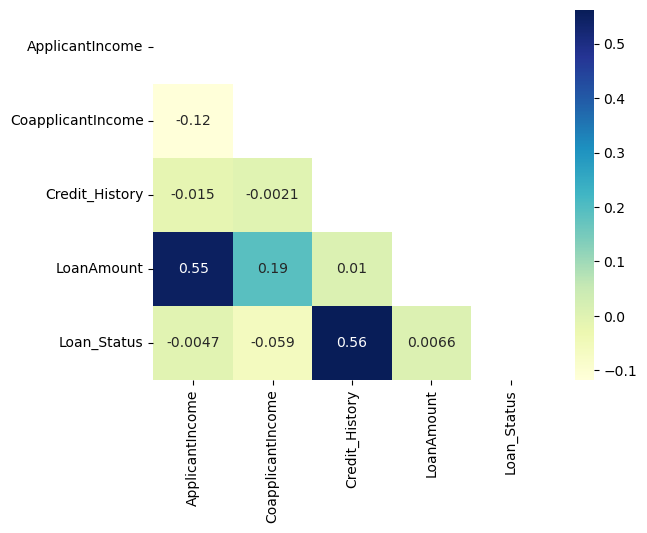

In [81]:
import seaborn as sb
import matplotlib.pyplot as mp
# creating mask
mask = np.triu(np.ones_like(numdf.corr()))
# plotting a triangle correlation heatmap
dataplot = sb.heatmap(numdf.corr(), cmap="YlGnBu", annot=True, mask=mask)
# displaying heatmap
mp.show()

In [82]:
#get dummies for Cat
cadf_f = cadf[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']]
cadf_f_dummies = pd.get_dummies(cadf_f)

In [83]:
cadf_f_dummies.head(3)
cadf_f_dummies.shape

(614, 15)

In [84]:
nudf.head(4)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,125.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0


In [87]:
# numerical 
nudf_f = df[['log_LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'log_total_income']]
nudf_f.head(3)

,log_LoanAmount,Loan_Amount_Term,Credit_History,log_total_income
0,6.965784,360.0,1.0,12.513974
1,7.000000,360.0,1.0,12.572463
2,6.044394,360.0,1.0,11.550747


In [88]:
y = df['Loan_Status']

In [89]:
## fill na for df 
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [90]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [91]:
df.isnull().sum()

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
log_LoanAmount           0
log_ApplicantIncome      0
log_CoapplicantIncome    0
total_income             0
log_total_income         0
dtype: int64

## Transform Columns

In [94]:
num_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'total_income']

cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [95]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [96]:
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)

## 4. Building a Predictive Model

In [97]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clf)
])

In [98]:
from sklearn import set_config

set_config(display='diagram')
display(clf_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History',
                                                   'total_income']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('model', LogisticRegression(random_state=0))])

In [99]:
from sklearn.model_selection import train_test_split
#z=num_cols+cat_cols
#X = df[z]
X = df[num_cols+cat_cols].astype(str)
y = df['Loan_Status'].astype(str)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [100]:
clf_pipeline.fit(X_train, y_train)
preds = clf_pipeline.predict(X_test)
score = clf_pipeline.score(X_test, y_test)
print(f"Model score: {score}") # model accuracy

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

Model score: 0.8211382113821138


Try paramater grid search to improve the results

In [103]:
grid_params = {'model__penalty' : ['none', 'l2'],
               'model__C' : np.logspace(-4, 4, 20)}

In [104]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(clf_pipeline, grid_params, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

Best Score of train set: 0.808534322820037
Best parameter set: {'model__C': 0.23357214690901212, 'model__penalty': 'l2'}
Test Score: 0.8211382113821138


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [105]:
from sklearn.preprocessing import StandardScaler

num_pipeline2 = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('minmax_scale', MinMaxScaler()),
    ('std_scale', StandardScaler()),
])

col_trans2 = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline2,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)
    
clf_pipeline2 = Pipeline(steps=[
    ('col_trans', col_trans2),
    ('model', clf)
])

In [106]:
grid_step_params = [{'col_trans__num_pipeline__minmax_scale': ['passthrough']},
                    {'col_trans__num_pipeline__std_scale': ['passthrough']}]

In [107]:
gs2 = GridSearchCV(clf_pipeline2, grid_step_params, scoring='accuracy')
gs2.fit(X_train, y_train)

print("Best Score of train set: "+str(gs2.best_score_))
print("Best parameter set: "+str(gs2.best_params_))
print("Test Score: "+str(gs2.score(X_test,y_test)))

Best Score of train set: 0.8064935064935066
Best parameter set: {'col_trans__num_pipeline__minmax_scale': 'passthrough'}
Test Score: 0.8211382113821138


In [110]:
#from sklearn.preprocessing import LabelEncoder
#df[num_cols+cat_cols], df['Loan_Status'] = LabelEncoder.fit_transform(df[num_cols+cat_cols], df['Loan_Status']) 
#df['Loan_Status'] = df['Loan_Status'].astype("object")
import pickle

In [111]:
pickle.dump(gs2, open( "model.p", "wb" ) )

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [112]:
model = pickle.load( open( "model.p", "rb" ) )

In [113]:
model

GridSearchCV(estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('minmax_scale',
                                                                                          MinMaxScaler()),
                                                                                         ('std_scale',
                                                                                          StandardScaler())]),
                                                                         ['LoanAmount',
                                                                          'Loan_Amount_Term',
                                                                          'Credit_History',
                                                                          'total_income']),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy=...equent')),
                                                                                         ('one-hot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area'])])),
                                       ('model',
                                        LogisticRegression(random_state=0))]),
             param_grid=[{'col_trans__num_pipeline__minmax_scale': ['passthrough']},
                         {'col_trans__num_pipeline__std_scale': ['passthrough']}],
             scoring='accuracy')

In [115]:
X_train.head(2)

,LoanAmount,Loan_Amount_Term,Credit_History,total_income,Gender,Married,Dependents,Education,Self_Employed,Property_Area
313,144.0,84.0,1.0,5746.0,Male,Yes,2,Graduate,Yes,Rural
58,180.0,360.0,1.0,10330.0,Male,Yes,1,Graduate,No,Urban


In [116]:
X_test = X.loc[[2]]
X_test

,LoanAmount,Loan_Amount_Term,Credit_History,total_income,Gender,Married,Dependents,Education,Self_Employed,Property_Area
2,66.0,360.0,1.0,3000.0,Male,Yes,0,Graduate,Yes,Urban


In [117]:
model.predict(X_test)

array(['1'], dtype=object)